In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("TTWO.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-04-15,3.666667,3.916667,3.416667,3.916667,3.916425,1785600
1,1997-04-16,3.916667,4.166667,3.583333,3.708333,3.708104,443700
2,1997-04-17,3.750000,4.083333,3.750000,3.833333,3.833096,252150
3,1997-04-18,3.833333,4.000000,3.833333,4.000000,3.999753,165900
4,1997-04-21,3.916667,4.000000,3.916667,4.000000,3.999753,77400


In [4]:
df.count()

Date         6194
Open         6194
High         6194
Low          6194
Close        6194
Adj Close    6194
Volume       6194
dtype: int64

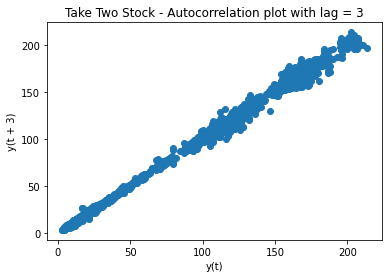

In [5]:
plt.figure()
lag_plot(df['Adj Close'], lag=3)
plt.title('Take Two Stock - Autocorrelation plot with lag = 3')
plt.show()

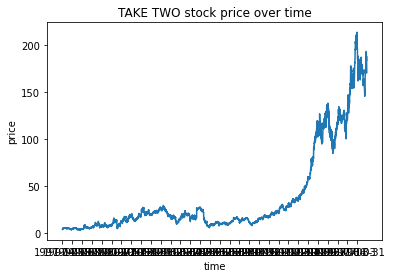

In [6]:
plt.plot(df["Date"], df["Adj Close"])
plt.xticks(np.arange(0,6194, 200), df['Date'][0:6194:20])
plt.title("TAKE TWO stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [7]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]

In [8]:
training_data = train_data['Adj Close'].values
test_data = test_data['Adj Close'].values

In [9]:
history = list(training_data)
model_predictions = []
N_test_observations = len(test_data)

In [10]:
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)

In [11]:
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 5.551342364525723


In [12]:
test_set_range = df[int(len(df)*0.7):].index

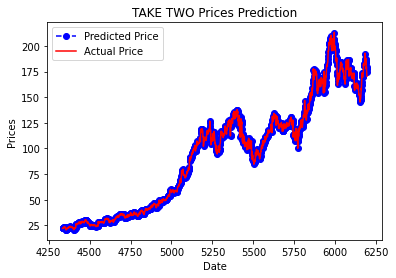

In [13]:
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')

plt.title('TAKE TWO Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()